# Validation of drive functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qudit_sim

## Constant numeric amplitude

In [2]:
drive = qudit_sim.DriveTerm(frequency=100., amplitude=(0.2+0.3j))

In [3]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

('((0.8 * cos(100.0 * t)) + (1.2 * sin(100.0 * t))) * cos(99.0 * t)',
 '((0.8 * cos(100.0 * t)) + (1.2 * sin(100.0 * t))) * sin(99.0 * t)',
 199.0)

In [4]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

('(0.4 * cos(1.0 * t)) + (0.6 * sin(1.0 * t))',
 '(-0.4 * sin(1.0 * t)) + (0.6 * cos(1.0 * t))',
 1.0)

## String amplitude

In [5]:
drive = qudit_sim.DriveTerm(frequency=100., amplitude='exp(-(t - 1.)**2/0.5)')

In [6]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

('(4.0 * (exp(-(t - 1.)**2/0.5)) * (cos(100.0 * t) - 1.j * sin(100.0 * t))).real * cos(99.0 * t)',
 '(4.0 * (exp(-(t - 1.)**2/0.5)) * (cos(100.0 * t) - 1.j * sin(100.0 * t))).real * sin(99.0 * t)',
 199.0)

In [7]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

('(2.0 * (exp(-(t - 1.)**2/0.5))).real * cos(1.0 * t) + (2.0 * (exp(-(t - 1.)**2/0.5))).imag * sin(1.0 * t)',
 '(2.0 * (exp(-(t - 1.)**2/0.5))).imag * cos(1.0 * t) - (2.0 * (exp(-(t - 1.)**2/0.5))).real * sin(1.0 * t)',
 1.0)

In [8]:
drive = qudit_sim.DriveTerm(frequency=100., amplitude='exp(-(t - 1.)**2/0.5)', phase=0.)

In [9]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

('abs(4.0 * (exp(-(t - 1.)**2/0.5))) * cos(0.0 - (100.0 * t)) * cos(99.0 * t)',
 'abs(4.0 * (exp(-(t - 1.)**2/0.5))) * cos(0.0 - (100.0 * t)) * sin(99.0 * t)',
 199.0)

In [10]:
drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

('abs(2.0 * (exp(-(t - 1.)**2/0.5))) * cos(0.0 - (1.0 * t))',
 'abs(2.0 * (exp(-(t - 1.)**2/0.5))) * sin(0.0 - (1.0 * t))',
 1.0)

## Array amplitude

In [11]:
tlist = np.linspace(0., 1., 100)
tlist_fine = np.linspace(0., 1., 1000)
amplitude = np.exp(20.j * tlist)
amplitude_fine = np.exp(20.j * tlist_fine)
drive = qudit_sim.DriveTerm(frequency=100., amplitude=amplitude)

199.0


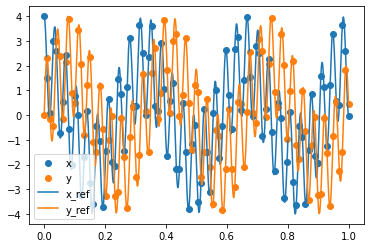

In [12]:
fn_x, fn_y, max_freq = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)
plt.scatter(tlist, fn_x(tlist, None), label='x')
plt.scatter(tlist, fn_y(tlist, None), label='y')
plt.plot(tlist_fine, (4. * amplitude_fine * np.exp(-100.j * tlist_fine)).real * np.cos(99. * tlist_fine), label='x_ref')
plt.plot(tlist_fine, (4. * amplitude_fine * np.exp(-100.j * tlist_fine)).real * np.sin(99. * tlist_fine), label='y_ref')
plt.legend()
print(max_freq)

1.0


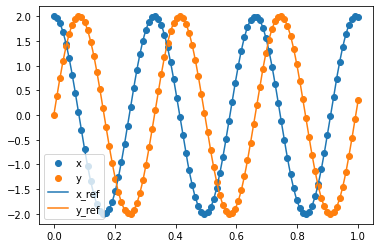

In [13]:
fn_x, fn_y, max_freq = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)
plt.scatter(tlist, fn_x(tlist, None), label='x')
plt.scatter(tlist, fn_y(tlist, None), label='y')
plt.plot(tlist_fine, 2. * (amplitude_fine.real * np.cos(1. * tlist_fine) + amplitude_fine.imag * np.sin(1. * tlist_fine)), label='x_ref')
plt.plot(tlist_fine, 2. * (amplitude_fine.imag * np.cos(1. * tlist_fine) - amplitude_fine.real * np.sin(1. * tlist_fine)), label='y_ref')
plt.legend()
print(max_freq)

## Function amplitude

In [14]:
def amplitude_fn(t, arg):
    return np.exp(20.j * t)

drive = qudit_sim.DriveTerm(frequency=100., amplitude=amplitude_fn)

199.0


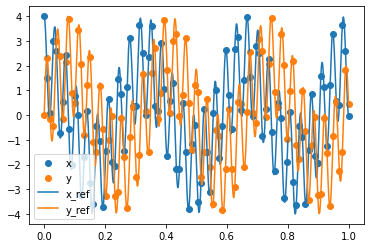

In [15]:
fn_x, fn_y, max_freq = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)
plt.scatter(tlist, fn_x(tlist, None), label='x')
plt.scatter(tlist, fn_y(tlist, None), label='y')
plt.plot(tlist_fine, (4. * amplitude_fn(tlist_fine, None) * np.exp(-100.j * tlist_fine)).real * np.cos(99. * tlist_fine), label='x_ref')
plt.plot(tlist_fine, (4. * amplitude_fn(tlist_fine, None) * np.exp(-100.j * tlist_fine)).real * np.sin(99. * tlist_fine), label='y_ref')
plt.legend()
print(max_freq)

1.0


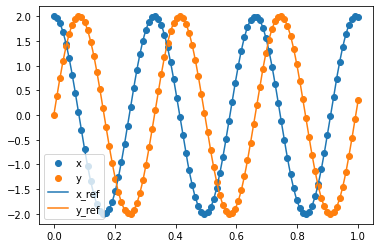

In [16]:
fn_x, fn_y, max_freq = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)
plt.scatter(tlist, fn_x(tlist, None), label='x')
plt.scatter(tlist, fn_y(tlist, None), label='y')
amplitude_fine = amplitude_fn(tlist_fine, None)
plt.plot(tlist_fine, 2. * (amplitude_fine.real * np.cos(1. * tlist_fine) + amplitude_fine.imag * np.sin(1. * tlist_fine)), label='x_ref')
plt.plot(tlist_fine, 2. * (amplitude_fine.imag * np.cos(1. * tlist_fine) - amplitude_fine.real * np.sin(1. * tlist_fine)), label='y_ref')
plt.legend()
print(max_freq)

## Pulse sequence

In [17]:
drag = qudit_sim.Drag(duration=0.4, amp=0.8, sigma=0.1, beta=0.02)
gaussq = qudit_sim.GaussianSquare(duration=1.4, amp=0.6, sigma=0.1, width=1.)
sequence = qudit_sim.PulseSequence([
    qudit_sim.SetFrequency(100.),
    qudit_sim.SetPhase(0.1),
    drag,
    qudit_sim.Delay(0.3),
    qudit_sim.ShiftPhase(0.2),
    qudit_sim.ShiftFrequency(-1.),
    gaussq
])

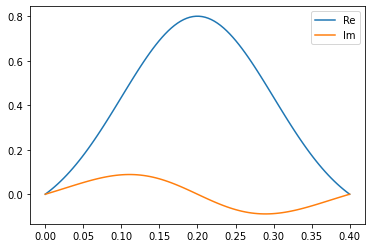

In [18]:
tlist = np.linspace(0., 0.4, 100)
plt.plot(tlist, drag(tlist, None).real, label='Re')
plt.plot(tlist, drag(tlist, None).imag, label='Im')
plt.legend();

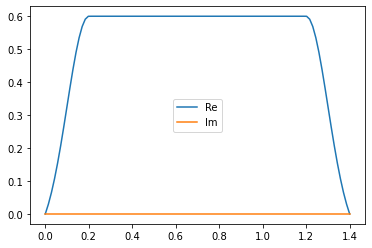

In [19]:
tlist = np.linspace(0., 1.4, 100)
plt.plot(tlist, gaussq(tlist, None).real, label='Re')
plt.plot(tlist, gaussq(tlist, None).imag, label='Im')
plt.legend();

In [20]:
drive = qudit_sim.DriveTerm(amplitude=sequence)

tlist_1 = np.linspace(0., 0.4, 400, endpoint=False)
tlist_2 = np.linspace(0.4, 0.7, 300, endpoint=False)
tlist_3 = np.linspace(0.7, 2.1, 1400, endpoint=False)
tlist = np.concatenate((tlist_1, tlist_2, tlist_3))

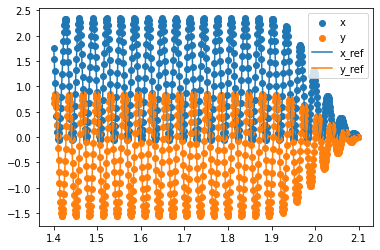

In [21]:
fn_x, fn_y, max_freq = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=False)

envelope_1 = (4. * drag(tlist_1, None) * np.exp(-1.j * (100. * tlist_1 + 0.1))).real
envelope_2 = np.zeros_like(tlist_2)
envelope_3 = (4. * gaussq(tlist_3 - 0.7, None) * np.exp(-1.j * (99. * tlist_3 + 0.3))).real

envelope = np.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[1400:]
envelope_trunc = envelope[1400:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, None), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, None), label='y')
plt.plot(tlist_trunc, envelope_trunc * np.cos(99. * tlist_trunc), label='x_ref')
plt.plot(tlist_trunc, envelope_trunc * np.sin(99. * tlist_trunc), label='y_ref')
plt.legend();

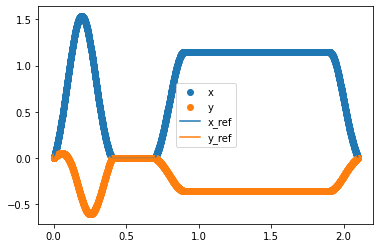

In [22]:
fn_x, fn_y, max_freq = drive.generate_fn(frame_frequency=99., drive_base=2., rwa=True)

envelope_1 = 2. * drag(tlist_1, None) * np.exp(-1.j * (1. * tlist_1 + 0.1))
envelope_2 = np.zeros_like(tlist_2)
envelope_3 = 2. * gaussq(tlist_3 - 0.7, None) * np.exp(-0.3j)

envelope = np.concatenate((envelope_1, envelope_2, envelope_3))

tlist_trunc = tlist[:]
envelope_trunc = envelope[:]
plt.scatter(tlist_trunc, fn_x(tlist_trunc, None), label='x')
plt.scatter(tlist_trunc, fn_y(tlist_trunc, None), label='y')
plt.plot(tlist_trunc, envelope_trunc.real, label='x_ref')
plt.plot(tlist_trunc, envelope_trunc.imag, label='y_ref')
plt.legend();